<a href="https://colab.research.google.com/github/shahansh22/crop-yield-prediction/blob/main/Yield_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General

In [ ]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rainfall_url = '/content/drive/MyDrive/YIELD/rainfall.csv'
temperature_url = '/content/drive/MyDrive/YIELD/temp.csv'
yield_url = '/content/drive/MyDrive/YIELD/yield.csv'

In [ ]:
rainfall_data = pd.read_csv(rainfall_url, sep=', ')
temperature_data = pd.read_csv(temperature_url, sep=', ')
yield_data = pd.read_csv(yield_url, sep=',')

<ipython-input-4-b719579895de>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rainfall_data = pd.read_csv(rainfall_url, sep=', ')
<ipython-input-4-b719579895de>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  temperature_data = pd.read_csv(temperature_url, sep=', ')


# Data Preparation

## Rainfall

In [ ]:
rainfall_data

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,2.03926,2016,Aug Average,Zimbabwe,ZWE
272828,0.48070,2016,Sep Average,Zimbabwe,ZWE
272829,9.13410,2016,Oct Average,Zimbabwe,ZWE
272830,72.95080,2016,Nov Average,Zimbabwe,ZWE


In [ ]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall - (MM)  272832 non-null  float64
 1   Year             272832 non-null  int64  
 2   Statistics       272832 non-null  object 
 3   Country          272832 non-null  object 
 4   ISO3             272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [ ]:
rainfall_data.describe()

,Rainfall - (MM),Year
count,272832.000000,272832.000000
mean,103.470868,1958.500000
std,113.231867,33.485133
min,0.000000,1901.000000
25%,24.168375,1929.750000
50%,66.431550,1958.500000
75%,149.647250,1987.250000
max,2699.190000,2016.000000


In [ ]:
# Number of countries
len(rainfall_data['Country'].unique())

196

In [ ]:
# Number of years (1901 - 2016)
len(rainfall_data['Year'].unique())

116

In [ ]:
# Rain data in years for each country
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()
rainfall_df

<ipython-input-10-6a65a69a815c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()


,Year,Country,ISO3,Rainfall - (MM)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330
22732,2016,Vietnam,VNM,1988.86180
22733,2016,Yemen,YEM,171.48137
22734,2016,Zambia,ZMB,803.47810


## Temperature

In [ ]:
temperature_data

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,18.75550,2016,Aug Average,Zimbabwe,ZWE
272828,22.99190,2016,Sep Average,Zimbabwe,ZWE
272829,25.86640,2016,Oct Average,Zimbabwe,ZWE
272830,25.85150,2016,Nov Average,Zimbabwe,ZWE


In [ ]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature - (Celsius)  272832 non-null  float64
 1   Year                     272832 non-null  int64  
 2   Statistics               272832 non-null  object 
 3   Country                  272832 non-null  object 
 4   ISO3                     272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [ ]:
temperature_data.describe()

,Temperature - (Celsius),Year
count,272832.000000,272832.000000
mean,18.631498,1958.500000
std,10.248635,33.485133
min,-34.121000,1901.000000
25%,13.231575,1929.750000
50%,22.736300,1958.500000
75%,25.797700,1987.250000
max,38.566900,2016.000000


In [ ]:
# Number of countries
len(temperature_data['Country'].unique())

196

In [ ]:
# Number of years (1901 - 2016)
len(temperature_data['Year'].unique())

116

In [ ]:
temperature_df =temperature_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).mean()
temperature_df

<ipython-input-16-589429e57895>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperature_df =temperature_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).mean()


,Year,Country,ISO3,Temperature - (Celsius)
0,1901,Afghanistan,AFG,13.172872
1,1901,Albania,ALB,11.030938
2,1901,Algeria,DZA,22.290008
3,1901,Andorra,AND,9.960649
4,1901,Angola,AGO,21.365725
...,...,...,...,...
22731,2016,Venezuela,VEN,26.478200
22732,2016,Vietnam,VNM,25.073158
22733,2016,Yemen,YEM,24.221200
22734,2016,Zambia,ZMB,22.737050


## Yield

In [ ]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Barley,1961,hg/ha,10800
1,Crops,Afghanistan,Yield,Barley,1962,hg/ha,10800
2,Crops,Afghanistan,Yield,Barley,1963,hg/ha,10800
3,Crops,Afghanistan,Yield,Barley,1964,hg/ha,10857
4,Crops,Afghanistan,Yield,Barley,1965,hg/ha,10857
...,...,...,...,...,...,...,...
63686,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
63687,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
63688,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
63689,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379


In [ ]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63691 entries, 0 to 63690
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   63691 non-null  object
 1   Area     63691 non-null  object
 2   Element  63691 non-null  object
 3   Item     63691 non-null  object
 4   Year     63691 non-null  int64 
 5   Unit     63691 non-null  object
 6   Value    63691 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


In [ ]:
yield_data.describe()

,Year,Value
count,63691.000000,6.369100e+04
mean,1992.332669,8.581113e+04
std,16.888797,1.008880e+05
min,1961.000000,0.000000e+00
25%,1978.000000,1.770700e+04
50%,1994.000000,4.705900e+04
75%,2007.000000,1.185070e+05
max,2019.000000,2.236842e+06


In [ ]:
# Number of countries
len(yield_data['Area'].unique())

203

In [ ]:
# Number of years (1961 - 2019)
len(yield_data['Year'].unique())

59

In [ ]:
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
yield_df

,Area,Item,Year,Unit,Value
0,Afghanistan,Barley,1961,hg/ha,10800
1,Afghanistan,Barley,1962,hg/ha,10800
2,Afghanistan,Barley,1963,hg/ha,10800
3,Afghanistan,Barley,1964,hg/ha,10857
4,Afghanistan,Barley,1965,hg/ha,10857
...,...,...,...,...,...
63686,Zimbabwe,Wheat,2015,hg/ha,20486
63687,Zimbabwe,Wheat,2016,hg/ha,19013
63688,Zimbabwe,Wheat,2017,hg/ha,17542
63689,Zimbabwe,Wheat,2018,hg/ha,16379


## Merging Data

In [ ]:
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall (mm)'}, axis=1, inplace=True)

In [ ]:
temperature_df.rename({'Temperature - (Celsius)': 'Temperature (Celsius)'}, axis=1, inplace=True)

In [ ]:
yield_df.rename({'Area': 'Country', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)
yield_df.drop('Unit', axis=1, inplace=True)

In [ ]:
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Country', 'Year', 'ISO3'])
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'])
rain_temp_yield_df.drop('ISO3', axis=1, inplace=True)
rain_temp_yield_df

,Year,Country,Rainfall (mm),Temperature (Celsius),Item,Yield (hg/ha)
0,1961,Afghanistan,339.52343,12.968494,Barley,10800
1,1961,Afghanistan,339.52343,12.968494,Maize,14000
2,1961,Afghanistan,339.52343,12.968494,Potatoes,86667
3,1961,Afghanistan,339.52343,12.968494,Wheat,10220
4,1961,Albania,860.63814,11.949795,Barley,10224
...,...,...,...,...,...,...
48676,2016,Zimbabwe,455.13295,22.310167,Maize,4405
48677,2016,Zimbabwe,455.13295,22.310167,Oats,20505
48678,2016,Zimbabwe,455.13295,22.310167,Potatoes,51792
48679,2016,Zimbabwe,455.13295,22.310167,Sweet potatoes,27283


In [ ]:
data = rain_temp_yield_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Yield (hg/ha)']]
data

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Yield (hg/ha)
0,1961,Afghanistan,Barley,339.52343,12.968494,10800
1,1961,Afghanistan,Maize,339.52343,12.968494,14000
2,1961,Afghanistan,Potatoes,339.52343,12.968494,86667
3,1961,Afghanistan,Wheat,339.52343,12.968494,10220
4,1961,Albania,Barley,860.63814,11.949795,10224
...,...,...,...,...,...,...
48676,2016,Zimbabwe,Maize,455.13295,22.310167,4405
48677,2016,Zimbabwe,Oats,455.13295,22.310167,20505
48678,2016,Zimbabwe,Potatoes,455.13295,22.310167,51792
48679,2016,Zimbabwe,Sweet potatoes,455.13295,22.310167,27283


In [ ]:
data_pred = yield_df[yield_df['Year']>2013]
data_pred

,Country,Item,Year,Yield (hg/ha)
53,Afghanistan,Barley,2014,15213
54,Afghanistan,Barley,2015,14291
55,Afghanistan,Barley,2016,13770
56,Afghanistan,Barley,2017,13933
57,Afghanistan,Barley,2018,6748
...,...,...,...,...
63686,Zimbabwe,Wheat,2015,20486
63687,Zimbabwe,Wheat,2016,19013
63688,Zimbabwe,Wheat,2017,17542
63689,Zimbabwe,Wheat,2018,16379


In [ ]:
# Number of countries
len(data.Country.unique())

158

In [ ]:
# Number of years
len(data.Year.unique())

56

# Data Exploration

## Rainfall

In [ ]:
rainfall_df

,Year,Country,ISO3,Rainfall (mm)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330
22732,2016,Vietnam,VNM,1988.86180
22733,2016,Yemen,YEM,171.48137
22734,2016,Zambia,ZMB,803.47810


<ipython-input-32-0dd3cc079fc3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rainfall_df.loc[rainfall_df['Country'] == 'India'].groupby('Year').mean().plot()


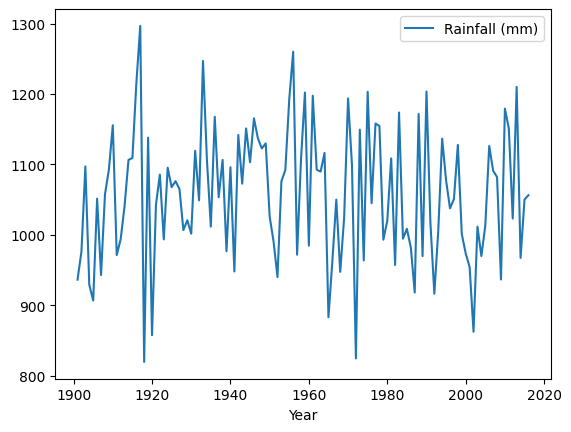

In [ ]:
rainfall_df.loc[rainfall_df['Country'] == 'India'].groupby('Year').mean().plot()
plt.show()

<ipython-input-33-c1abbf45b7d3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = rainfall_df.groupby('Year').mean()


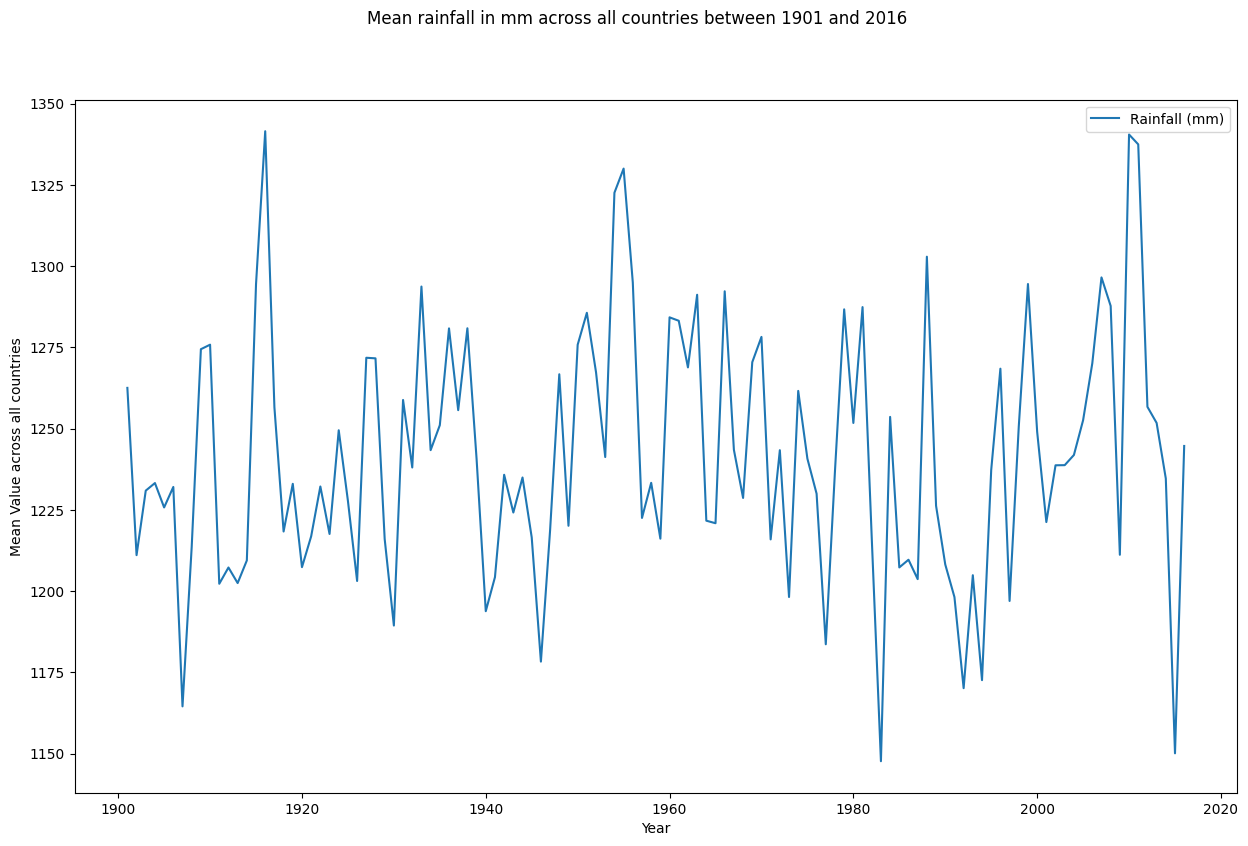

In [ ]:
temp_data = rainfall_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Temperature

<ipython-input-34-243d8d7a6fbc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperature_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()


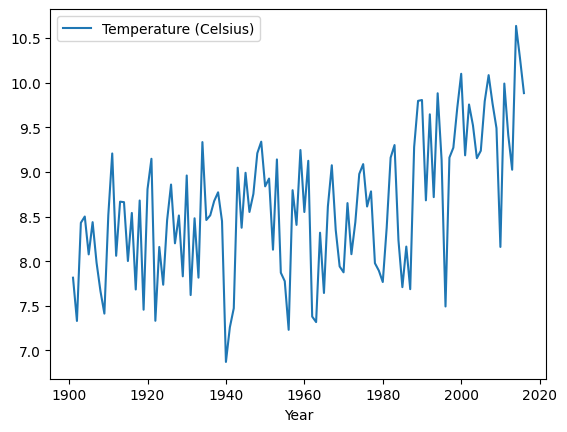

In [ ]:
temperature_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

<ipython-input-35-5f938d230e89>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = temperature_df.groupby('Year').mean()


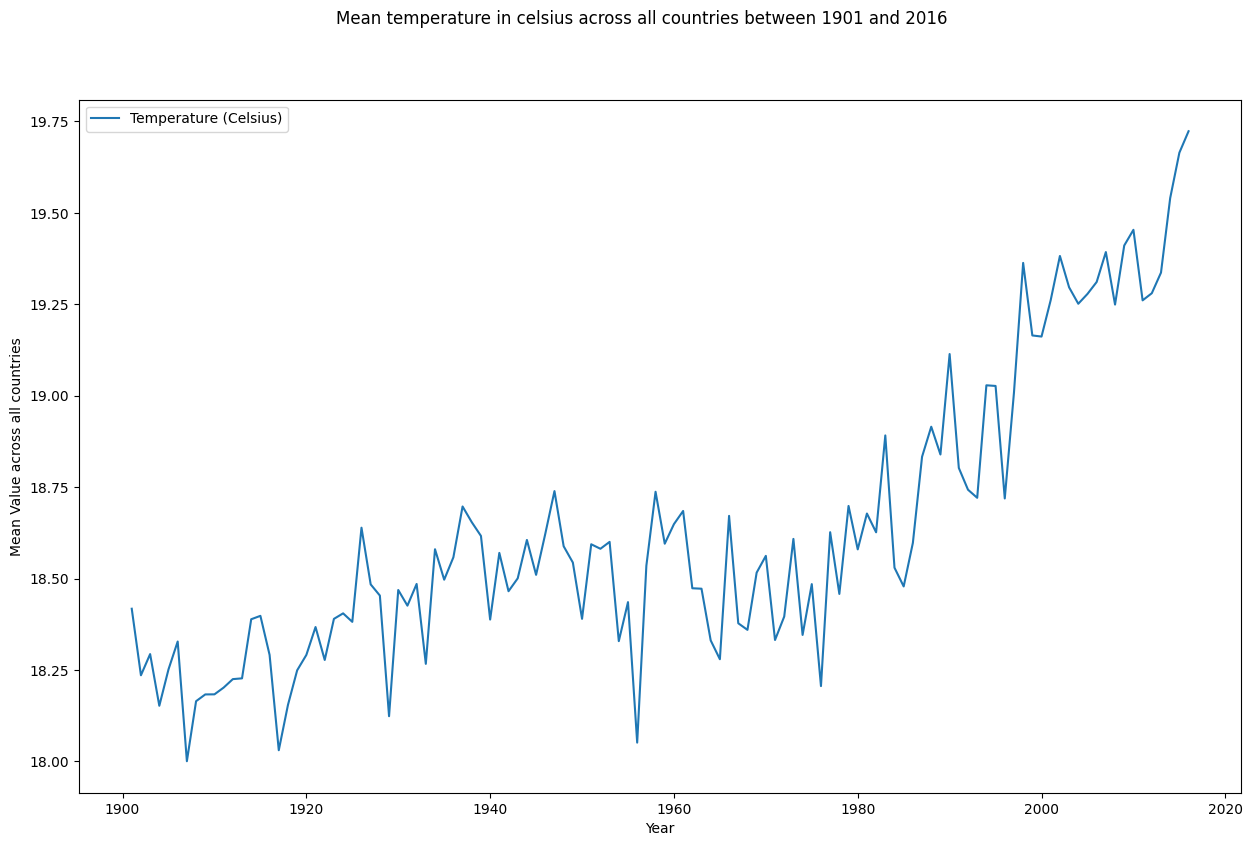

In [ ]:
temp_data = temperature_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature in celsius across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Yield

<ipython-input-36-c78350832fc6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yield_mean = yield_data.groupby(['Year', 'Item']).mean()


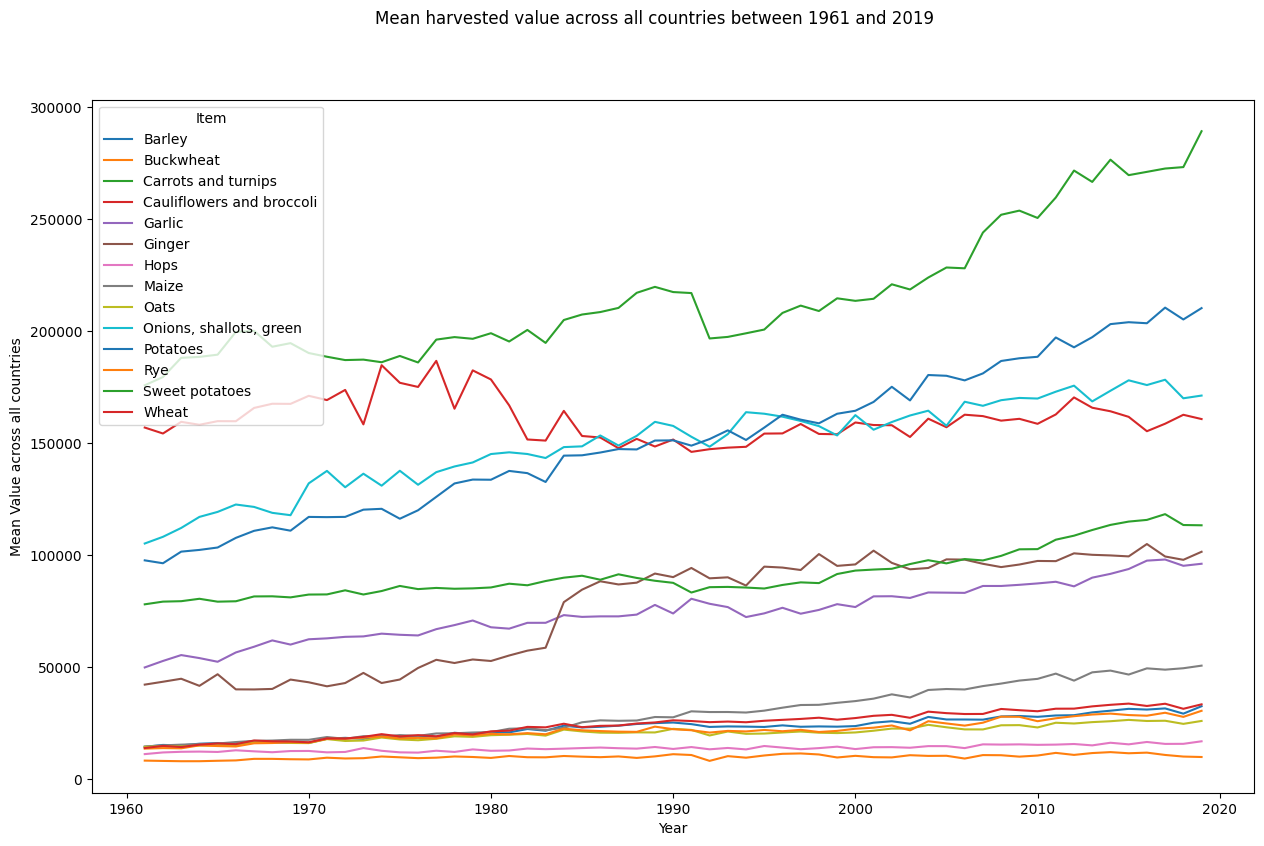

In [ ]:
yield_mean = yield_data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

yield_mean['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

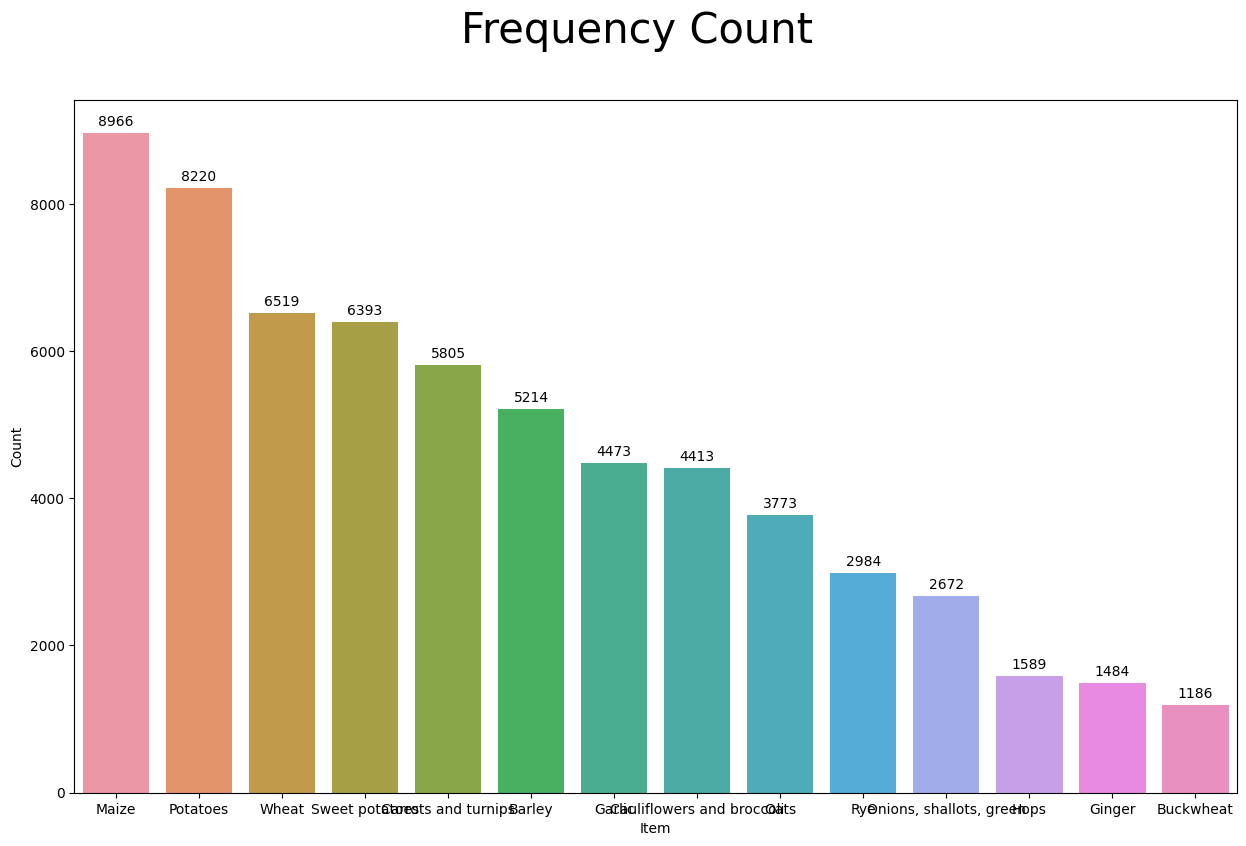

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = yield_data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 100, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

## Merged Data

<ipython-input-38-09e8739e2d65>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = data.groupby(['Year', 'Item']).mean()


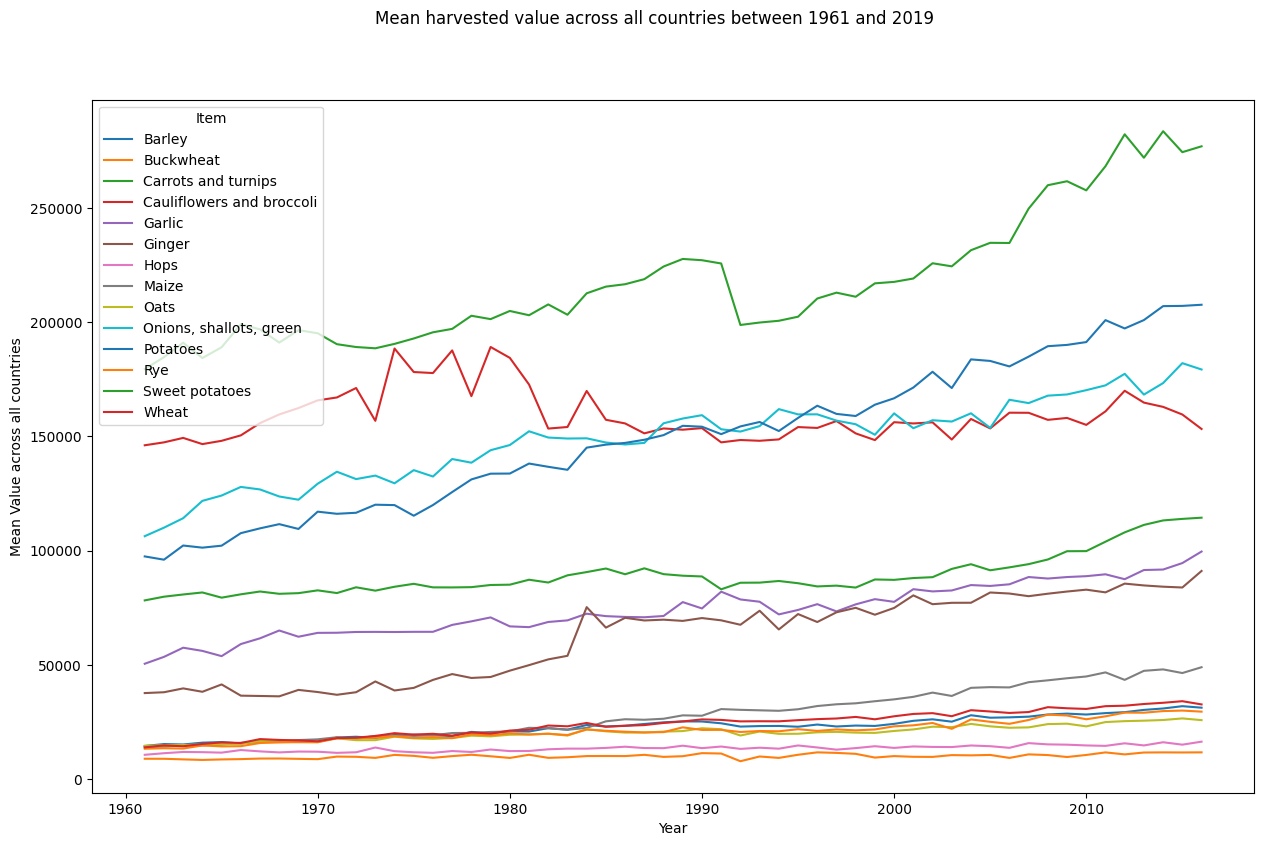

In [ ]:
temp_data = data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

temp_data['Yield (hg/ha)'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

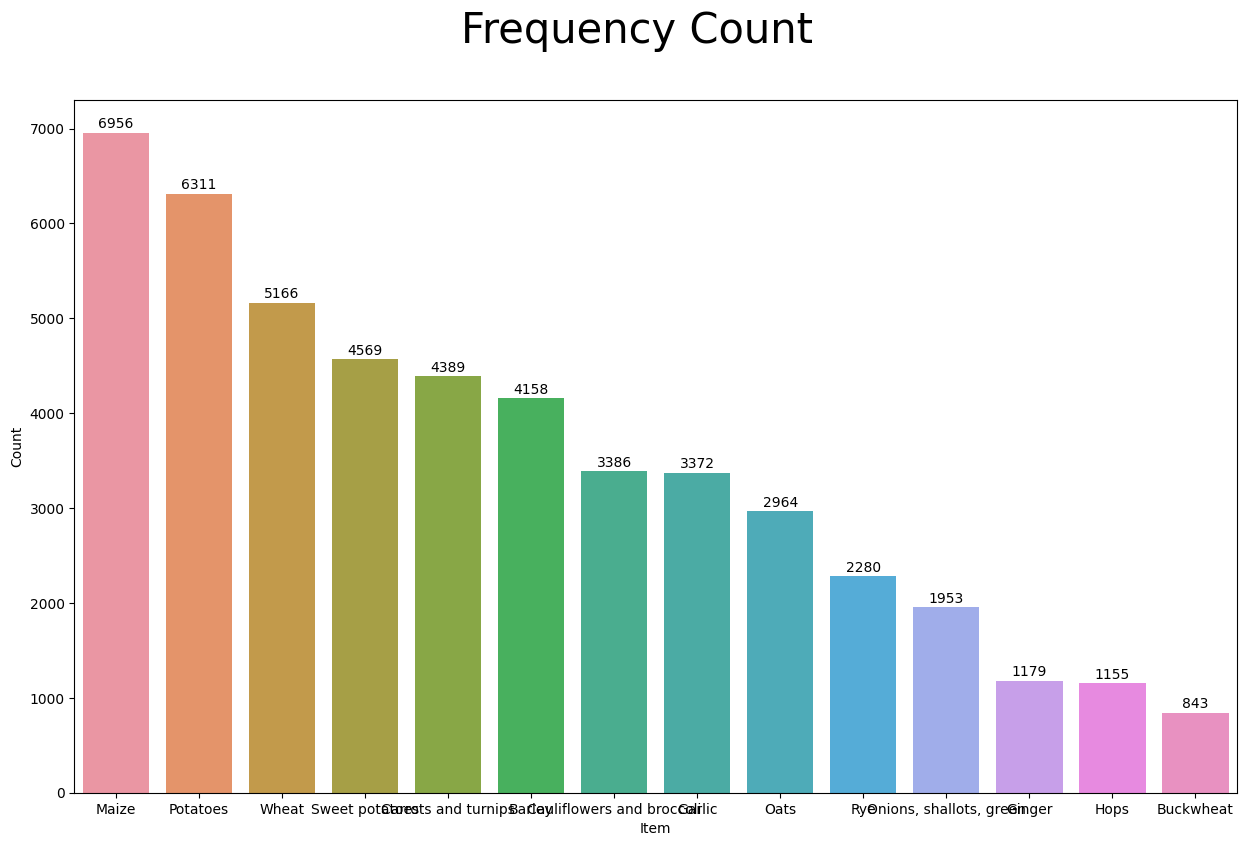

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 50, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

<ipython-input-40-4b9532546031>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


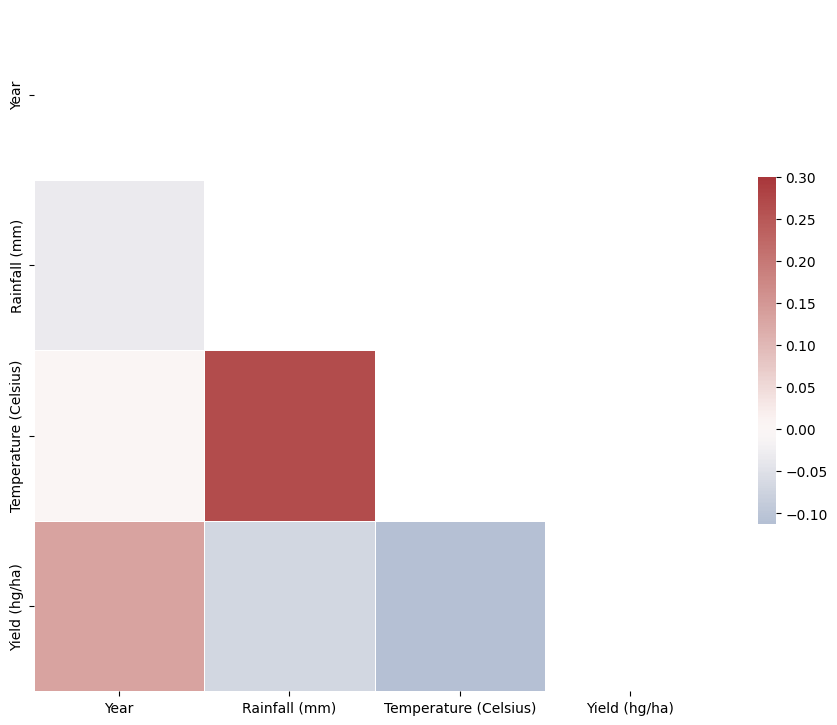

In [ ]:
corr = data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Preprocessing

## One Hot Encoding

In [ ]:
data.shape

(48681, 6)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(data, columns=['Country', 'Item'], prefix=['Country', 'Item'])
data = df_onehot.loc[:, df_onehot.columns != 'Yield (hg/ha)']
data['Yield (hg/ha)'] = df_onehot['Yield (hg/ha)']

In [ ]:
data.shape

(48681, 176)

## Backward Elimination

In [ ]:
import statsmodels.api as sm

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

data = data[cols]
data.insert(len(data.columns), 'Yield (hg/ha)', y)

In [ ]:
data.shape

(48681, 154)

## Removing of Outliers

In [ ]:
from scipy import stats

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 11).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Yield (hg/ha)', y)
data = X

In [ ]:
data.shape

(29553, 154)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Yield (hg/ha)', y)

data = data_without_yield

In [ ]:
data.shape

(29553, 154)

# Modelling

In [ ]:
y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

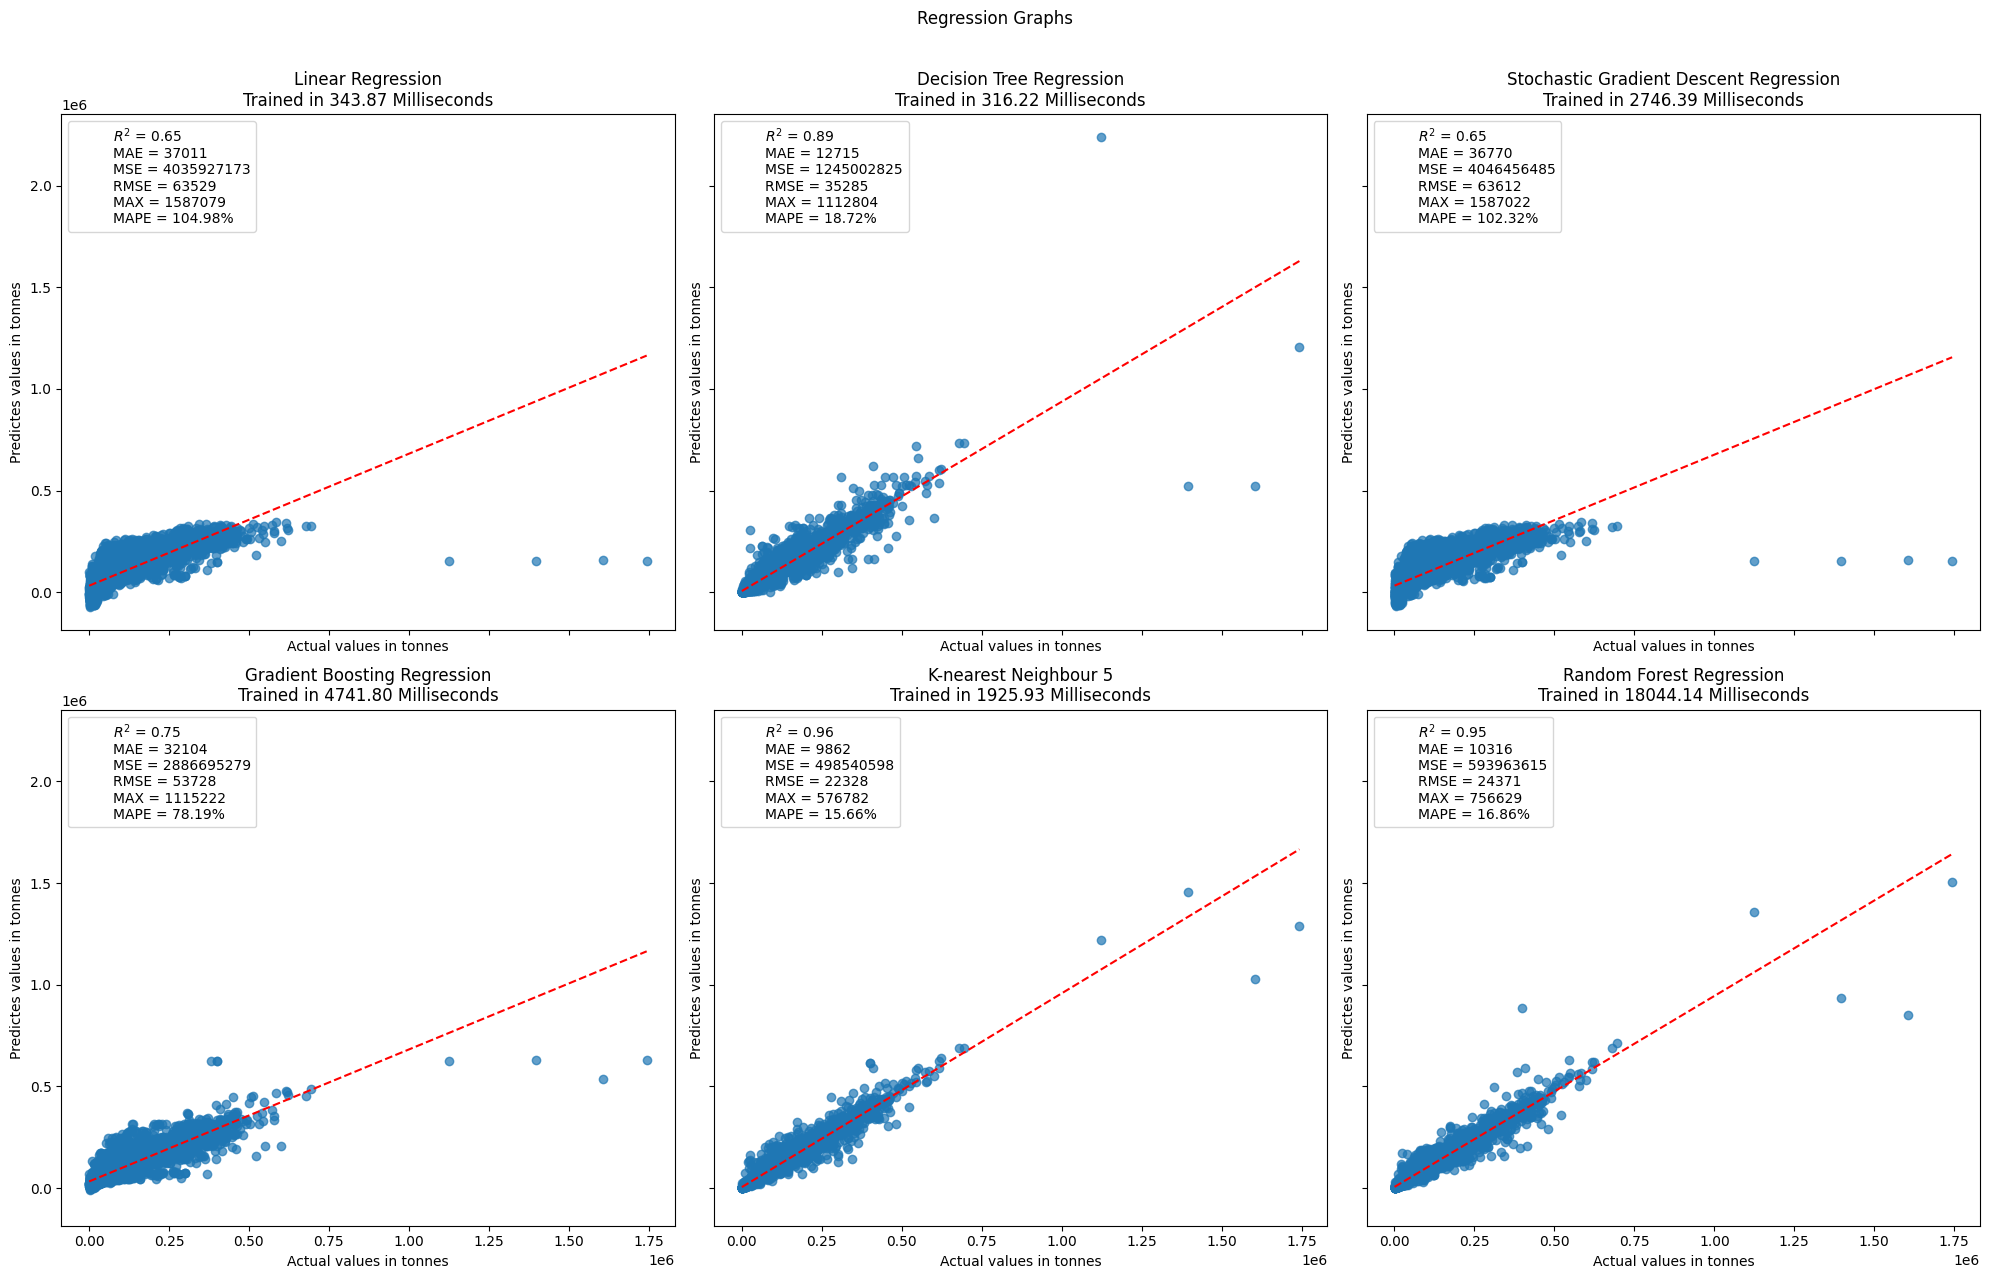

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_error')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Stochastic Gradient Descent Regression', sgd),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]


fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time


  plot_regression_results(ax, y_test, y_pred, name, estimated_time,
                          (r'$R^2$ = {:.2f}' + '\n' +
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n' +
                          r'MAPE = {:.2f}%')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred),
                                  mean_absolute_percentage_error(y_test, y_pred)))

plt.suptitle('Regression Graphs')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

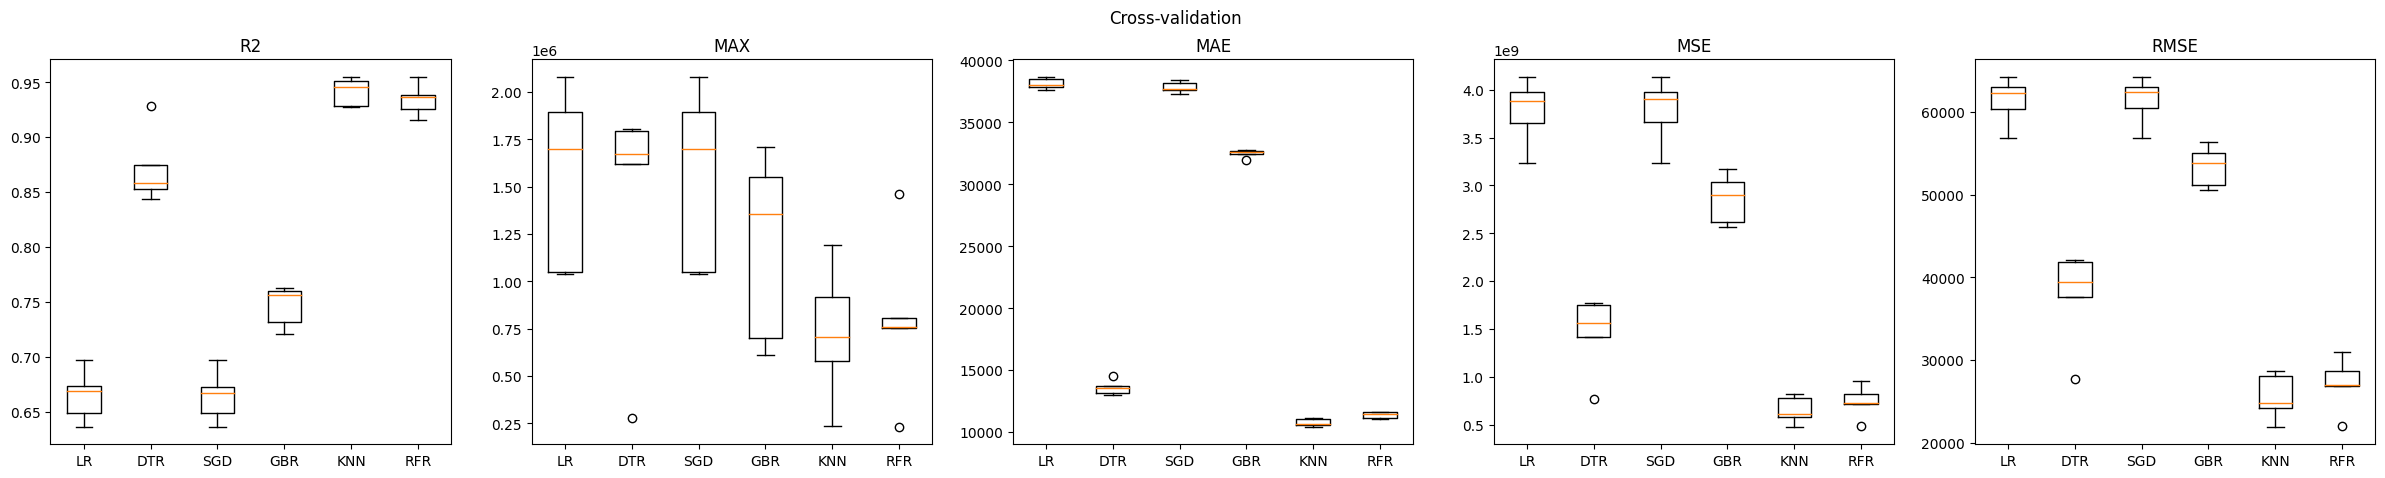

In [ ]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:
  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)

  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'DTR', 'SGD', 'GBR', 'KNN', 'RFR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()

In [ ]:
final_pred = knn.predict(X_test)
final_pred_rfr = rfr.predict(X_test)

In [ ]:
final_pred

array([ 48962.8, 224095.8, 348905. , ...,  11343.4, 167146.4,  23048.2])

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':final_pred})
df

,Actual,Predicted
15754,56613,48962.8
44190,243751,224095.8
23063,347494,348905.0
27605,23800,21201.4
5889,16964,16563.8
...,...,...
14178,45330,46978.0
38679,481269,315259.0
28136,17054,11343.4
29684,200375,167146.4


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, final_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, final_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, final_pred)))

Mean Absolute Error: 9862.444357976654
Mean Squared Error: 498540597.71612924
Root Mean Squared Error: 22328.02270054671


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, final_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, final_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, final_pred_rfr)))

Mean Absolute Error: 10316.066545423786
Mean Squared Error: 593963615.4459466
Root Mean Squared Error: 24371.36876430921


In [ ]:
# Calculate the absolute errors
errors = abs(final_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 9862.44 degrees.
Accuracy: 84.34 %.


<ipython-input-62-72f771468dd7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-62-72f771468dd7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_pred, hist=False, color="b", label="Fitted Values" ,

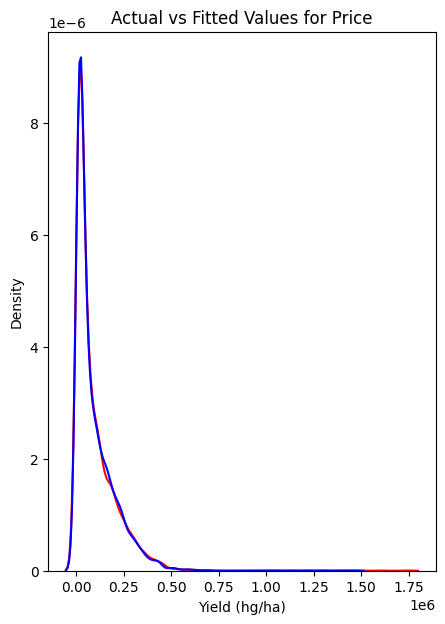

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(final_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()